In [1]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt #used to generate the legends
from typing import List

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension: prova
Current folders are:
prova.0


### uncomment to show all the rows in tables

In [2]:
#display all the rows of the dataframe  
#pd.set_option('display.max_rows', None)

# creation of firm dataframes

In [3]:
#each firm will have its dataframe
#containing the values of the names of the columns for all the time units (rows)
colNames=["firm class type", "initial inventories","total costs", "final inventories","profits", "added value",\
          "total production", "cost of production", "cost of unused factors","total lost production", \
          "total cost of lost production", "cost of labor", "cost of capital", "cost of substitution"]

#fileNameArray is the array that will contain the names of the file of the balance sheets (one file for each firm), 
#subdivided by ranks in the columns of the array; 'itemsize=len(fileNameRoot)+30' is supposed to be sufficient to 
#report the names of the file;
fileNameArray=np.chararray((ag0num, rankNum), itemsize=len(fileNameRoot)+30, unicode=True)

In [4]:
#operating by folders to load the names of the files reported in the balancesheetList files
for k in range(rankNum):
    #which folder
    os.chdir("../"+folder+"."+str(k))
    with open(fileNameRoot+"_balancesheetList_"+str(k)+".csv","r") as fileList:
        reader = csv.reader(fileList, delimiter = ',')
        #read the name of the files, containing _balancesheetList_, present in the current set of folders
        for row in reader:
            for i in range(len(row)):
                fileNameArray[i,k]=row[i]

In [5]:
#creating a dictionary of firm dataframes
firmData={}
for k in range(rankNum):
    #in the folder with name extension == k
    os.chdir("../"+folder+"."+str(k))
    #repeating for the number of agent type 0 in each folder
    for i in range(ag0num):
        #extracting the agent uid from the name of the file
        p1=fileNameArray[i,k].find('(')
        p2=fileNameArray[i,k].find(')')+1
        uid=fileNameArray[i,k][p1:p2]
        #filling the dictionary with uids as keys and the balancesheetLists of the related firm as values
        firmData[uid]=pd.read_csv(fileNameArray[i,k], header=None)

#naming the firm dataframe columns, firm by firm, by scrolling the keys of the dictionary
for aFirm in firmData.keys():
    firmData[aFirm].columns=colNames

# Retrieve a firm

In [6]:
#retrieve a firm with id and rank
def retrieveFirmBalancesheet(id,r):
    return firmData['('+str(id)+', 0, '+str(r)+')']

In [7]:
#example
#retrieveFirmBalancesheet(29,2)

# The allFirmData dataframe

In [8]:
#create a dataframe summing up all the firm dataframes
allFirmData=firmData[list(firmData.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                      #independent copy with a new name

for aFirmUid in list(firmData.keys())[1:]: #from the second to the last
    allFirmData=allFirmData.add(firmData[aFirmUid])

allFirmData.__description__="all firms"

In [9]:
allFirmData

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution
0,20.0,0.0,34176.450666,312.2,-33864.250666,312.2,16.939739,254.0,33922.450666,0.000000,0.0,207.0,4796.157142,308.062500
1,20.0,312.2,95923.142847,727.1,-95508.242847,414.9,21.806644,351.0,95572.142847,1.225914,18.0,207.0,5949.136531,174.416667
2,20.0,727.1,118982.730616,1839.6,-117870.230616,1112.5,57.430833,880.0,118102.730616,0.000000,0.0,207.0,8009.172531,487.187867
3,20.0,1839.6,160183.450620,3293.3,-158729.750620,1453.7,75.583086,1154.0,159029.450620,0.000000,0.0,207.0,9366.041472,572.652778
4,20.0,3293.3,187320.829435,4670.9,-185943.229435,1377.6,77.685873,1205.0,186115.829435,4.623093,110.0,207.0,9365.405274,641.237011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20.0,198887.9,258752.278719,201683.8,-255956.378719,2795.9,147.419269,2201.0,256551.278719,0.000000,0.0,1180.0,13015.604431,838.225363
96,20.0,201683.8,260312.088620,203555.6,-258440.288620,1871.8,178.234232,2787.0,257525.088620,89.373345,1265.0,1180.0,13064.120642,838.870749
97,20.0,203555.6,261282.412835,206184.5,-258653.512835,2628.9,161.070613,2425.0,258857.412835,17.785901,325.0,1180.0,13059.150917,839.000350
98,20.0,206184.5,261183.018336,208029.1,-259338.418336,1844.6,106.986916,1748.0,259435.018336,20.929546,297.0,1181.0,13053.481668,839.078077


In [10]:
allFirmData.__description__

'all firms'

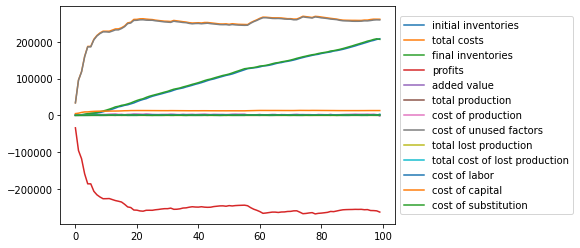

In [11]:
allFirmData.drop(['firm class type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot: >

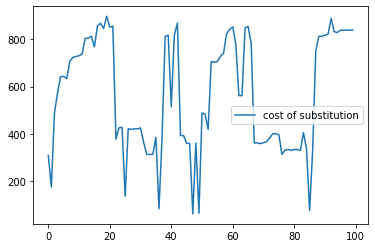

In [12]:
allFirmData[['cost of substitution']].plot()

<AxesSubplot: >

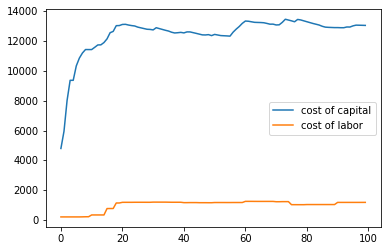

In [13]:
allFirmData[['cost of capital','cost of labor']].plot()

# Considering groups of firms

In [14]:
#summarize a subset of balancesheets of firm with 'dimensional class' in a given list
def sumBalancesheetsWithAGivenDimensionalClass(dimClassList: List):
    tmpDict={}
    for aFirmUid in list(firmData.keys())[:]:
        if firmData[aFirmUid]['firm class type'].loc[0] in dimClassList:
            tmpDict[aFirmUid]=firmData[aFirmUid]
    print("found",len(tmpDict), "firms")
    
    if tmpDict=={}: return 0 #firms with the required dimensional class: not found
        
    allLocalFirmData=tmpDict[list(tmpDict.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                              #independent copy with a new name

    for aFirmUid in list(tmpDict.keys())[1:]: #from the second to the last
        allLocalFirmData=allLocalFirmData.add(tmpDict[aFirmUid])

    memo="firms of groups"
    for g in dimClassList: memo = memo +" "+str(g)
    allLocalFirmData.__description__= memo
    
    return allLocalFirmData


In [15]:
#example with dimensional class 0
sumOfBalanceSheetSubset = sumBalancesheetsWithAGivenDimensionalClass([0])

found 1 firms


In [16]:
sumOfBalanceSheetSubset.__description__

'firms of groups 0'

In [17]:
sumOfBalanceSheetSubset

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution
0,0.0,0.0,16850.515755,67.6,-16782.915755,67.6,2.477468,52.0,16798.515755,0.000000,0.0,80.0,3381.800000,234.847222
1,0.0,67.6,67636.000000,152.1,-67551.500000,84.5,2.613645,65.0,67571.000000,0.000000,0.0,80.0,3358.315278,0.000000
2,0.0,152.1,67166.305556,557.7,-66760.705556,405.6,17.339046,312.0,66854.305556,0.000000,0.0,80.0,3807.200000,264.388889
3,0.0,557.7,76144.000000,1149.2,-75552.500000,591.5,25.367106,455.0,75689.000000,0.000000,0.0,80.0,4920.000000,341.666667
4,0.0,1149.2,98400.000000,1774.5,-97774.700000,625.3,26.279208,481.0,97919.000000,0.000000,0.0,80.0,4920.000000,341.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,68107.0,120872.000000,69256.2,-119722.800000,1149.2,51.167432,884.0,119988.000000,0.000000,0.0,504.0,6043.600000,419.694444
96,0.0,69256.2,120872.000000,70523.7,-119604.500000,1267.5,56.830153,975.0,119897.000000,0.000000,0.0,504.0,6043.600000,419.694444
97,0.0,70523.7,120872.000000,71368.7,-120027.000000,845.0,53.274233,975.0,119897.000000,17.785901,325.0,504.0,6043.600000,419.694444
98,0.0,71368.7,120872.000000,72433.4,-119807.300000,1064.7,47.959397,819.0,120053.000000,0.000000,0.0,504.0,6043.600000,419.694444


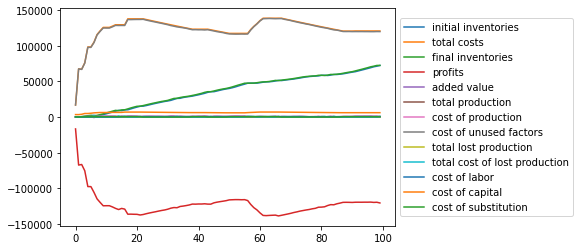

In [18]:
sumOfBalanceSheetSubset.drop(['firm class type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot: >

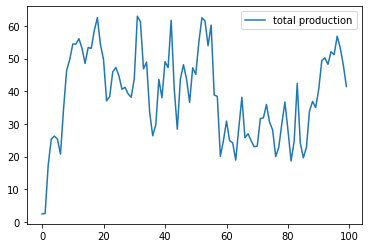

In [19]:
sumOfBalanceSheetSubset[['total production']].plot()

<AxesSubplot: >

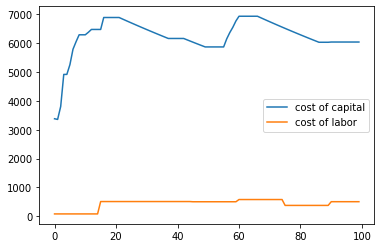

In [20]:
sumOfBalanceSheetSubset[['cost of capital', 'cost of labor']].plot()

# The National Economic Balance Table

In [21]:
allFirmData[['initial inventories', 'added value', 'final inventories']]

,initial inventories,added value,final inventories
0,0.0,312.2,312.2
1,312.2,414.9,727.1
2,727.1,1112.5,1839.6
3,1839.6,1453.7,3293.3
4,3293.3,1377.6,4670.9
...,...,...,...
95,198887.9,2795.9,201683.8
96,201683.8,1871.8,203555.6
97,203555.6,2628.9,206184.5
98,206184.5,1844.6,208029.1
